In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [18]:
df = pd.read_csv('/content/customer_data.csv')

df.head(5)

,name,age,gender,education,income,country,purchase_frequency,spending
0,Teresa Williams MD,42,Female,High School,53936,Slovenia,0.9,13227.120
1,Christine Myers,49,Female,Master,82468,Aruba,0.6,12674.040
2,Dwayne Moreno,55,Male,Bachelor,56941,Cyprus,0.3,5354.115
3,Amy Norton,24,Female,Bachelor,60651,Palau,0.2,2606.510
4,Tonya Adams,64,Male,Master,81884,Zambia,0.9,18984.780


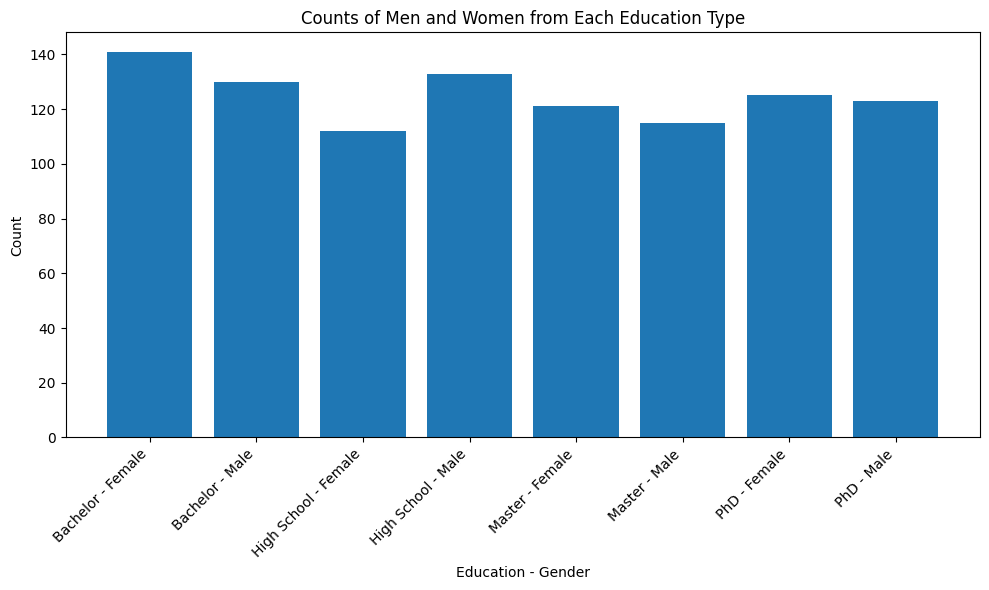

In [ ]:

education_gender_counts = df.groupby(['education', 'gender']).size().reset_index(name='Count')
education_gender_counts


# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(education_gender_counts['education'] + ' - ' + education_gender_counts['gender'],
        education_gender_counts['Count'])
plt.xlabel('Education - Gender')
plt.ylabel('Count')
plt.title('Counts of Men and Women from Each Education Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [19]:
df = df[['gender','education','income']]
df
df.gender.replace({'Female':0,'Male':1},inplace=True)
filtered_df = df[df['education'].isin(['Bachelor','Master', 'PhD'])]

filtered_df['income_in_k'] = np.round(filtered_df['income'] / 1000,1)
filtered_df.drop('income',inplace=True,axis=1)
filtered_df.drop('education',inplace=True,axis=1)
filtered_df



<ipython-input-19-3df423d40552>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.gender.replace({'Female':0,'Male':1},inplace=True)
<ipython-input-19-3df423d40552>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['income_in_k'] = np.round(filtered_df['income'] / 1000,1)
<ipython-input-19-3df423d40552>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.dro

,gender,income_in_k
1,0,82.5
2,1,56.9
3,0,60.7
4,1,81.9
5,0,61.4
...,...,...
994,0,26.3
995,0,98.2
997,1,59.8
998,0,58.3


In [20]:
filtered_df.reset_index(inplace=True,drop=True)
filtered_df

,gender,income_in_k
0,0,82.5
1,1,56.9
2,0,60.7
3,1,81.9
4,0,61.4
...,...,...
750,0,26.3
751,0,98.2
752,1,59.8
753,0,58.3


In [21]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       755 non-null    int64  
 1   income_in_k  755 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 11.9 KB


In [22]:
filtered_df.describe()

,gender,income_in_k
count,755.000000,755.000000
mean,0.487417,59.308609
std,0.500173,23.665154
min,0.000000,20.100000
25%,0.000000,38.550000
50%,0.000000,58.500000
75%,1.000000,79.750000
max,1.000000,99.800000


In [23]:
filtered_df.gender.value_counts()

0    387
1    368
Name: gender, dtype: int64

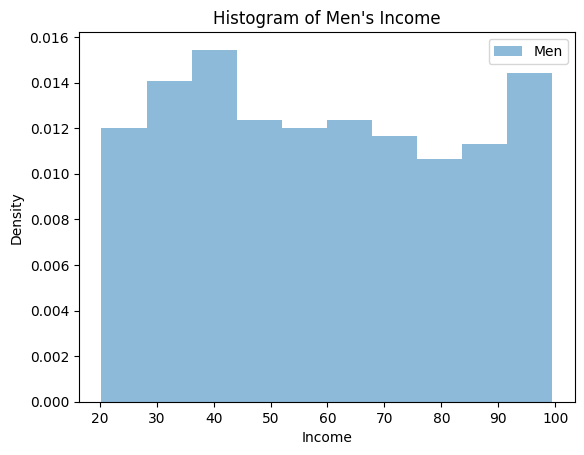

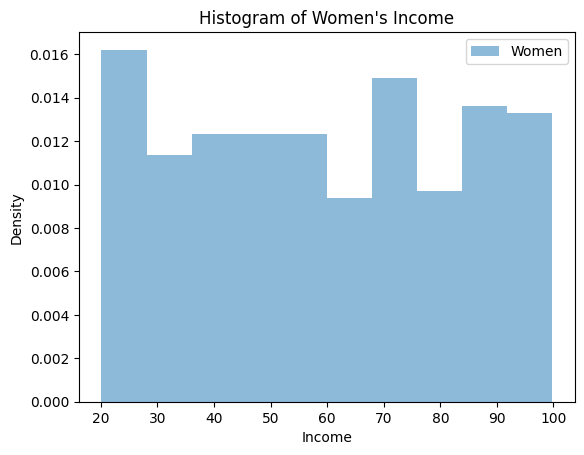

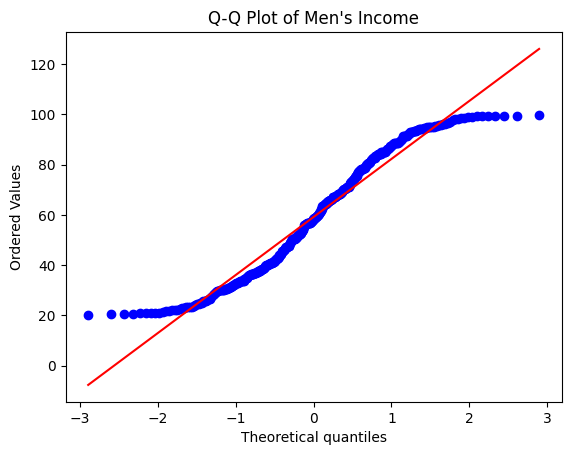

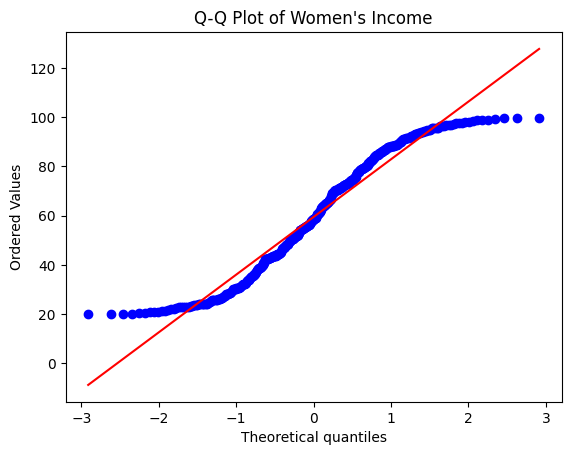

In [24]:
# Splitting the data into male and female groups
male_income = filtered_df[filtered_df['gender'] == 1]['income_in_k']
female_income = filtered_df[filtered_df['gender'] == 0]['income_in_k']
# Plot histogram for men's income
plt.hist(male_income, bins=10, density=True, alpha=0.5, label='Men')
plt.xlabel('Income')
plt.ylabel('Density')
plt.title("Histogram of Men's Income")
plt.legend()
plt.show()

# Plot histogram for women's income
plt.hist(female_income, bins=10, density=True, alpha=0.5, label='Women')
plt.xlabel('Income')
plt.ylabel('Density')
plt.title("Histogram of Women's Income")
plt.legend()
plt.show()

# Create Q-Q plot for men's income
plt.figure()
stats.probplot(male_income, dist="norm", plot=plt)
plt.title("Q-Q Plot of Men's Income")
plt.show()

# Create Q-Q plot for women's income
plt.figure()
stats.probplot(female_income, dist="norm", plot=plt)
plt.title("Q-Q Plot of Women's Income")
plt.show()

In [25]:
#checking for normal distribution using KS
kstest_result_male = stats.kstest(male_income, 'norm')
ks_statistic_male = kstest_result_male.statistic
p_value_male = kstest_result_male.pvalue


kstest_result_female = stats.kstest(female_income, 'norm')
ks_statistic_female = kstest_result_female.statistic
p_value_female = kstest_result_female.pvalue

alpha = 0.05  # significance level

if p_value_male > alpha:
    print("The data of male appears to be normally distributed.")
else:
    print("The data of male does not appear to be normally distributed.")

if p_value_female > alpha:
    print("The data of female appears to be normally distributed.")
else:
    print("The data of female does not appear to be normally distributed.")

The data of male does not appear to be normally distributed.
The data of female does not appear to be normally distributed.


In [26]:
# Performing the Mann-Whitney U test for unpaired populations
statistic, p_value = stats.mannwhitneyu(male_income, female_income, alternative='two-sided')

# Checking the results
if p_value < 0.05:
    print("There is a significant difference between male and female incomes.")
else:
    print("There is no significant difference between male and female incomes.")
print(p_value)   

There is no significant difference between male and female incomes.
0.8628342282817971
